In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('AusApparalSales4thQrt2020.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [2]:
# Check for missing values
missing_values = df.isna()

# Check for non-missing values
non_missing_values = df.notna()

# Count the number of missing values in each column
missing_values = df.isna().sum()

# Count the number of non-missing values in each column
non_missing_values = df.notna().sum()

print(missing_values)



Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [3]:
print(non_missing_values)


Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [4]:
#Recommendations for handling missing values

#df.dropna(inplace=True)

#df.fillna(0 , inplace = True)

#df.fillna(df.mean(), inplace = True)


In [5]:
#Handling Incorrect Data

#df.loc[df['Sales']] == 'incorrect data', 'Sales'] = np.nan

#df.fillna(df.mean(), inplace = True)

In [6]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [7]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = df.copy()

df1[['Unit', 'Sales']] = scaler.fit_transform(df[['Unit', 'Sales']])



In [8]:
df1.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [9]:
df1['Sales'].value_counts()

Sales
0.111111    406
0.126984    402
0.063492    370
0.095238    369
0.079365    362
           ... 
0.809524      9
0.936508      9
0.825397      9
0.920635      7
0.888889      5
Name: count, Length: 64, dtype: int64

In [10]:
df1['Date'] = pd.to_datetime(df['Date'])

df1['Daily'] = df1['Date'].dt.day

df1['Weekly'] = df1['Date'].dt.isocalendar().week

df1['Monthly'] = df1['Date'].dt.month

df1['Quarterly'] = df1['Date'].dt.quarter


In [11]:
df1[['Sales', 'Unit']].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [12]:
sales_mode = df1['Sales'].mode()
unit_mode = df1['Unit'].mode()

print("Mode for Sales:", sales_mode)
print("Mode for Unit:", unit_mode)


Mode for Sales: 0    0.111111
Name: Sales, dtype: float64
Mode for Unit: 0    0.111111
Name: Unit, dtype: float64


In [13]:
df1['Group'].value_counts()

Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64

In [14]:
df1.groupby('Group')['Sales'].sum().idxmax()

df1.groupby('Group')['Sales'].sum().idxmin()

print('Highest group sales:', df1.groupby('Group')['Sales'].sum().idxmax())

print('Lowest group sales:', df1.groupby('Group')['Sales'].sum().idxmin())

Highest group sales:  Men
Lowest group sales:  Seniors


<Axes: xlabel='Group'>

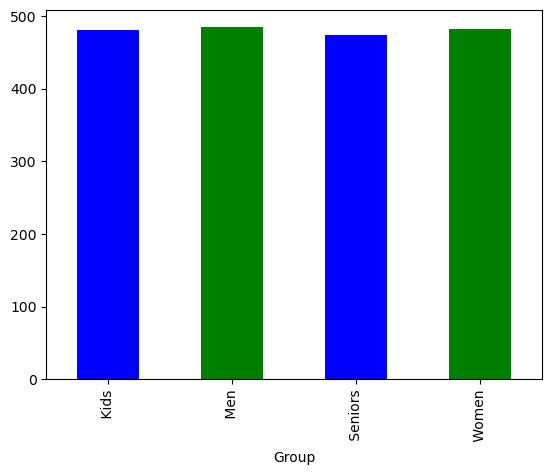

In [15]:
df1.groupby('Group')['Sales'].sum().plot(kind='bar', color=['blue', 'green'])



In [16]:
# Weekly report
weekly_report = df1.groupby('Weekly')['Sales'].sum()
print("Weekly Report:")
print(weekly_report)


Weekly Report:
Weekly
40     84.857143
41    152.777778
42    150.476190
43    151.587302
44    122.460317
45    113.809524
46    115.761905
47    115.380952
48    117.698413
49    169.412698
50    181.492063
51    182.317460
52    183.047619
53     79.571429
Name: Sales, dtype: float64


<Axes: xlabel='Weekly'>

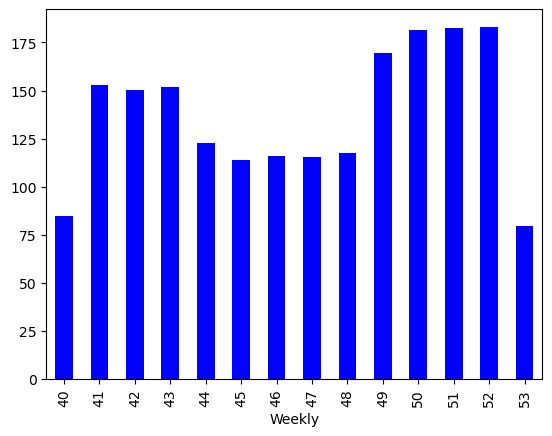

In [17]:
weekly_report.plot(kind='bar', color='blue')

In [18]:
# Monthly report
monthly_report = df1.groupby('Monthly')['Sales'].sum()
print("Monthly Report:")
print(monthly_report)

Monthly Report:
Monthly
10    645.650794
11    495.761905
12    779.238095
Name: Sales, dtype: float64


<Axes: xlabel='Monthly'>

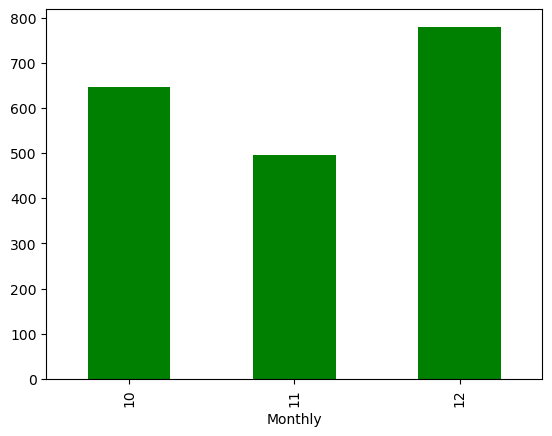

In [19]:
monthly_report.plot(kind='bar', color='green')

In [20]:
# Quarterly report
quarterly_report = df1.groupby('Quarterly')['Sales'].sum()
print("Quarterly Report:")
print(quarterly_report)

Quarterly Report:
Quarterly
4    1920.650794
Name: Sales, dtype: float64


<Axes: xlabel='Quarterly'>

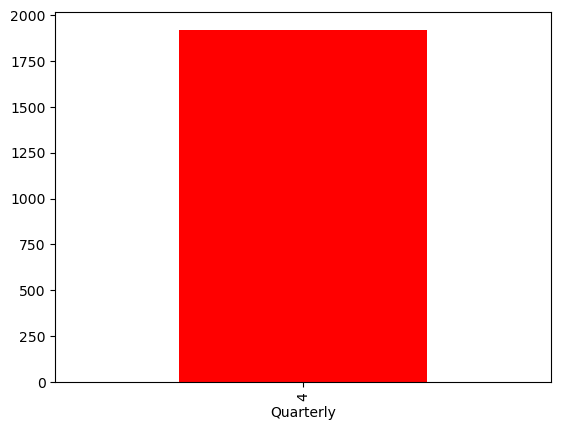

In [21]:
quarterly_report.plot(kind='bar', color='red')

In [22]:
#State wise sales analysis

# State and Group wise sales analysis
state_group_sales = df1.groupby(['State', 'Group'])['Sales'].sum()

print("State and Group wise sales analysis:")
print(state_group_sales)


State and Group wise sales analysis:
State  Group  
NSW    Kids       109.444444
       Men        112.206349
       Seniors    106.904762
       Women      113.158730
NT     Kids        27.619048
       Men         28.015873
       Seniors     26.126984
       Women       27.317460
QLD    Kids        45.460317
       Men         44.714286
       Seniors     43.428571
       Women       44.285714
SA     Kids        83.587302
       Men         84.476190
       Seniors     84.873016
       Women       86.476190
TAS    Kids        28.095238
       Men         27.984127
       Seniors     27.301587
       Women       26.841270
VIC    Kids       158.793651
       Men        159.095238
       Seniors    158.507937
       Women      159.571429
WA     Kids        27.142857
       Men         27.952381
       Seniors     26.428571
       Women       24.841270
Name: Sales, dtype: float64


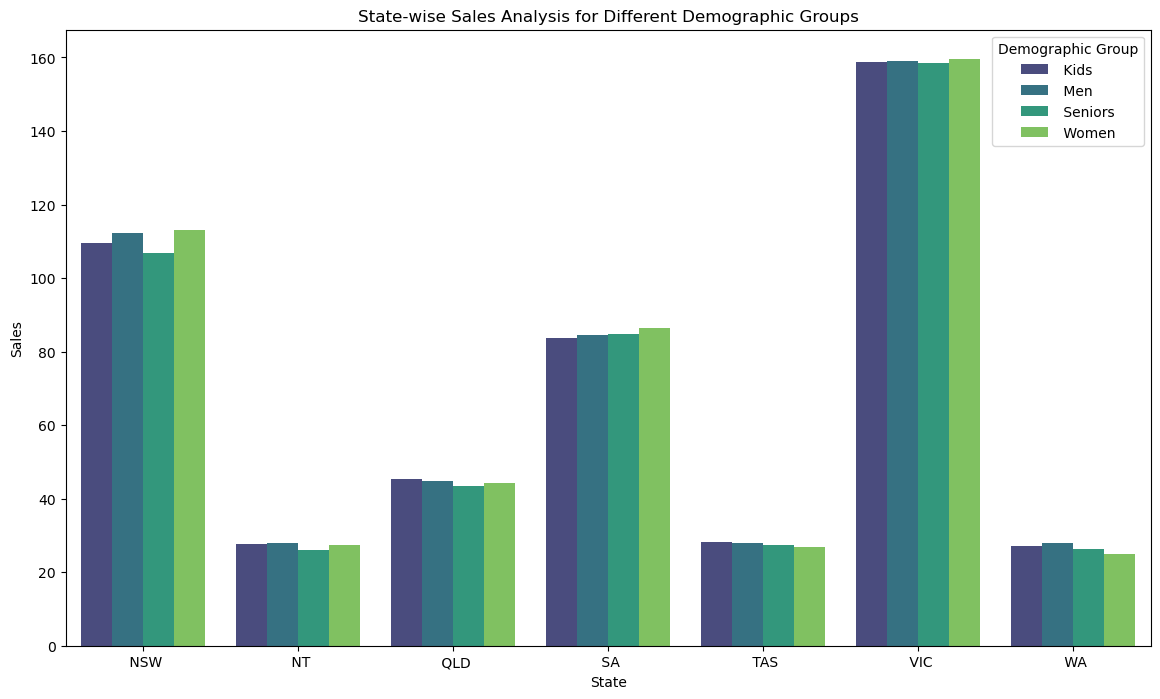

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert state_group_sales Series to DataFrame
state_group_sales_df = state_group_sales.to_frame().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales_df, palette='viridis')
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Demographic Group')
plt.show()

In [24]:
# Group wise sales analysis for each state
group_state_sales = df1.groupby(['Group', 'State'])['Sales'].sum()

print("Group wise sales analysis for each state:")

print(group_state_sales)

Group wise sales analysis for each state:
Group    State
Kids     NSW      109.444444
         NT        27.619048
         QLD       45.460317
         SA        83.587302
         TAS       28.095238
         VIC      158.793651
         WA        27.142857
Men      NSW      112.206349
         NT        28.015873
         QLD       44.714286
         SA        84.476190
         TAS       27.984127
         VIC      159.095238
         WA        27.952381
Seniors  NSW      106.904762
         NT        26.126984
         QLD       43.428571
         SA        84.873016
         TAS       27.301587
         VIC      158.507937
         WA        26.428571
Women    NSW      113.158730
         NT        27.317460
         QLD       44.285714
         SA        86.476190
         TAS       26.841270
         VIC      159.571429
         WA        24.841270
Name: Sales, dtype: float64


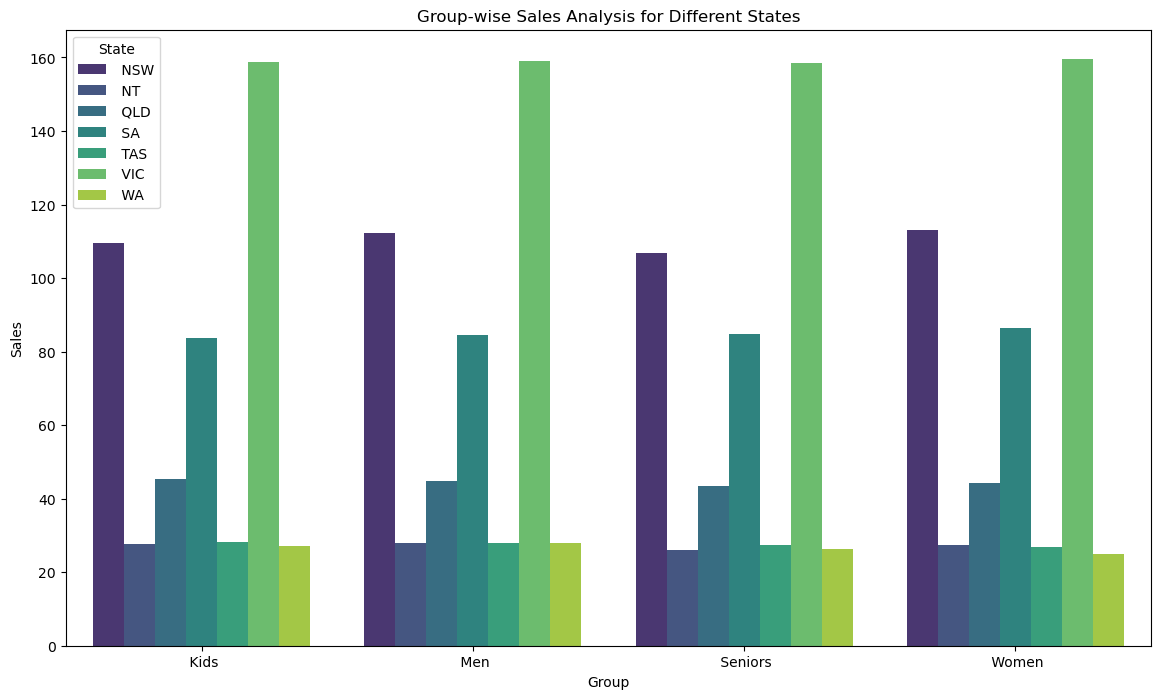

In [25]:
# Convert group_state_sales Series to DataFrame
group_state_sales_df = group_state_sales.to_frame().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Group', y='Sales', hue='State', data=group_state_sales_df, palette='viridis')
plt.title('Group-wise Sales Analysis for Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.legend(title='State')
plt.show()
    

In [26]:
# Time of the day sales analysis

time_sales = df1.groupby('Time')['Sales'].sum().reset_index()

print("Time of the day sales analysis:")
print(time_sales)

Time of the day sales analysis:
         Time       Sales
0   Afternoon  643.857143
1     Evening  631.666667
2     Morning  645.126984


Peak sales period:  Morning
Off-peak sales period:  Evening


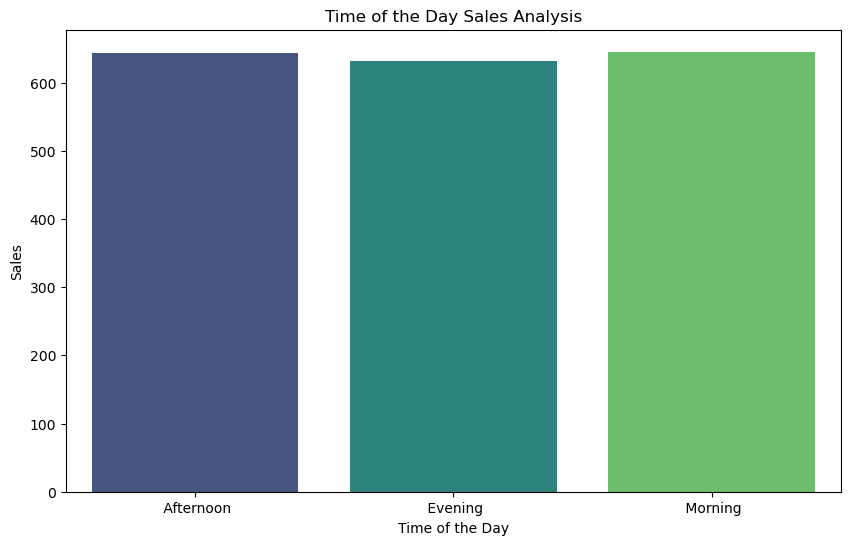

In [27]:
peak_time = time_sales.loc[time_sales['Sales'].idxmax()]['Time']
off_peak_time = time_sales.loc[time_sales['Sales'].idxmin()]['Time']

# Print peak and off-peak periods
print(f"Peak sales period: {peak_time}")
print(f"Off-peak sales period: {off_peak_time}")

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')
plt.title('Time of the Day Sales Analysis')
plt.xlabel('Time of the Day')
plt.ylabel('Sales')
plt.show()

Day wise sales analysis:
    Daily      Sales
0       1  63.142857
1       2  61.873016
2       3  63.269841
3       4  64.031746
4       5  64.984127
5       6  60.920635
6       7  61.476190
7       8  66.507937
8       9  63.269841
9      10  66.380952
10     11  62.301587
11     12  63.523810
12     13  64.968254
13     14  67.460317
14     15  65.396825
15     16  63.269841
16     17  65.682540
17     18  60.984127
18     19  64.190476
19     20  62.571429
20     21  64.714286
21     22  63.507937
22     23  63.015873
23     24  65.539683
24     25  63.952381
25     26  65.174603
26     27  63.984127
27     28  63.936508
28     29  66.063492
29     30  64.555556


<Axes: xlabel='Daily'>

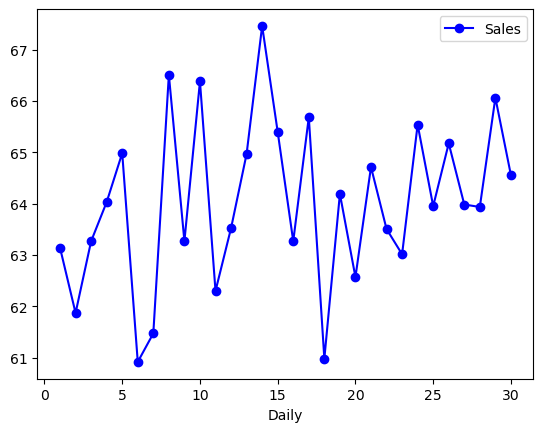

In [30]:
# Day wise sales analysis

day_sales = df1.groupby('Daily')['Sales'].sum().reset_index()

print("Day wise sales analysis:")
print(day_sales)

day_sales.plot(x='Daily', y='Sales', kind='line', marker='o', color='blue')


In [31]:
# Week wise sales analysis

week_sales = df1.groupby('Weekly')['Sales'].sum().reset_index()

print("Week wise sales analysis:")
print(week_sales)

Week wise sales analysis:
    Weekly       Sales
0       40   84.857143
1       41  152.777778
2       42  150.476190
3       43  151.587302
4       44  122.460317
5       45  113.809524
6       46  115.761905
7       47  115.380952
8       48  117.698413
9       49  169.412698
10      50  181.492063
11      51  182.317460
12      52  183.047619
13      53   79.571429


<Axes: xlabel='Weekly'>

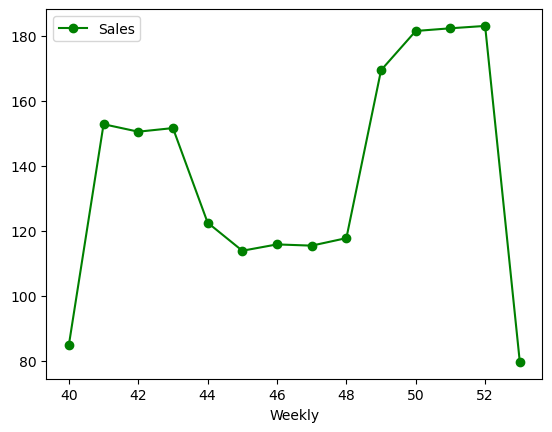

In [32]:
week_sales.plot(x='Weekly', y='Sales', kind='line', marker='o', color='green')

Month wise sales analysis:
   Monthly       Sales
0       10  645.650794
1       11  495.761905
2       12  779.238095


<Axes: xlabel='Monthly'>

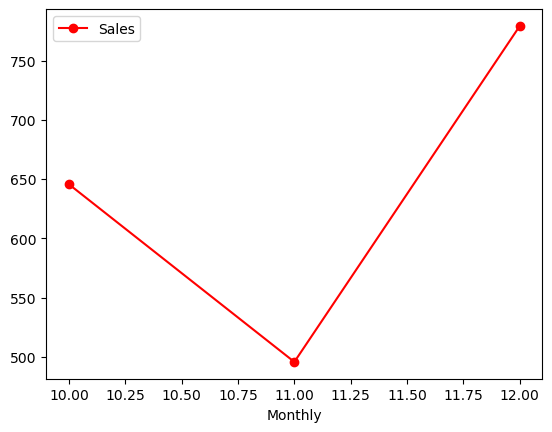

In [34]:
# Month wise sales analysis

month_sales = df1.groupby('Monthly')['Sales'].sum().reset_index()

print("Month wise sales analysis:")
print(month_sales)

month_sales.plot(x='Monthly', y='Sales', kind='line', marker='o', color='red')